<a href="https://colab.research.google.com/github/pb-roshith/dog-vs-cat-image-classification-CNN/blob/main/dog_and_cat_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0


In [9]:
from zipfile import ZipFile
dataset='/content/cat-and-dog.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("extracted successfully dude")

extracted successfully dude


In [10]:
# prompt: i have uploaded a data set  test_set, i contains another test_set inside it, delete the outer test_set  and keeps the inner test_set

import os
import shutil

# Assuming the inner 'test_set' is directly inside the extracted 'test_set' directory
inner_test_set_path = '/content/test_set/test_set'
outer_test_set_path = '/content/test_set'

if os.path.exists(inner_test_set_path) and os.path.exists(outer_test_set_path):
  try:
      # Rename the inner 'test_set' to replace the outer one
      os.rename(inner_test_set_path, outer_test_set_path + '_temp')
      shutil.rmtree(outer_test_set_path)  # Delete the original outer directory
      os.rename(outer_test_set_path + '_temp', outer_test_set_path) # Rename the temp directory
      print(f"Successfully moved contents of '{inner_test_set_path}' to '{outer_test_set_path}' and removed the original outer directory.")
  except OSError as e:
      print(f"Error: {e}")
elif not os.path.exists(inner_test_set_path):
  print("Inner test_set directory not found.")
elif not os.path.exists(outer_test_set_path):
  print("Outer test_set directory not found.")


Successfully moved contents of '/content/test_set/test_set' to '/content/test_set' and removed the original outer directory.


In [11]:
# prompt: i have uploaded a data set  training_set, i contains another training_set inside it, delete the outer training_set  and keeps the inner training_set

import os
import shutil

# Assuming the inner 'training_set' is directly inside the extracted 'training_set' directory
inner_training_set_path = '/content/training_set/training_set'
outer_training_set_path = '/content/training_set'

if os.path.exists(inner_training_set_path) and os.path.exists(outer_training_set_path):
  try:
      # Rename the inner 'training_set' to replace the outer one
      os.rename(inner_training_set_path, outer_training_set_path + '_temp')
      shutil.rmtree(outer_training_set_path)  # Delete the original outer directory
      os.rename(outer_training_set_path + '_temp', outer_training_set_path) # Rename the temp directory
      print(f"Successfully moved contents of '{inner_training_set_path}' to '{outer_training_set_path}' and removed the original outer directory.")
  except OSError as e:
      print(f"Error: {e}")
elif not os.path.exists(inner_training_set_path):
  print("Inner training_set directory not found.")
elif not os.path.exists(outer_training_set_path):
  print("Outer training_set directory not found.")


Successfully moved contents of '/content/training_set/training_set' to '/content/training_set' and removed the original outer directory.


In [14]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.7 MB/s eta 0:00:00


In [15]:
import tensorflow as tf
# from keras.preprocessing.image import ImageDataGenerator # This import is causing the issue
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tf.keras instead
from tensorflow.keras.models import Sequential # Import from tf.keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # Import from tf.keras

In [16]:
tf.__version__

'2.19.0'

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2023 images belonging to 2 classes.


In [19]:
cnn = tf.keras.models.Sequential()

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [23]:
cnn.add(tf.keras.layers.Flatten())

In [24]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [25]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [26]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 45s 175ms/step - accuracy: 0.5561 - loss: 0.6900 - val_accuracy: 0.6772 - val_loss: 0.6034
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.6621 - loss: 0.6144 - val_accuracy: 0.6619 - val_loss: 0.6028
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.7084 - loss: 0.5663 - val_accuracy: 0.7523 - val_loss: 0.5255
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 171ms/step - accuracy: 0.7306 - loss: 0.5338 - val_accuracy: 0.7415 - val_loss: 0.5140
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.7359 - loss: 0.5163 - val_accuracy: 0.7494 - val_loss: 0.5322
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 170ms/step - accuracy: 0.7631 - loss: 0.4827 - val_accuracy: 0.7538 - val_loss: 0.5209
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.7749 - loss: 0.4698 - val_accuracy: 0.7741 - val_loss: 0.4949
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 44s 176ms/step - accuracy: 0.7775 - loss: 0

In [33]:
import numpy as np
from keras.preprocessing import image

In [34]:
def pred(imgg):
  test_image = image.load_img(imgg, target_size = (64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = cnn.predict(test_image)
  training_set.class_indices
  if result[0][0] == 1:
      prediction = 'dog'
  else:
      prediction = 'cat'
  return prediction

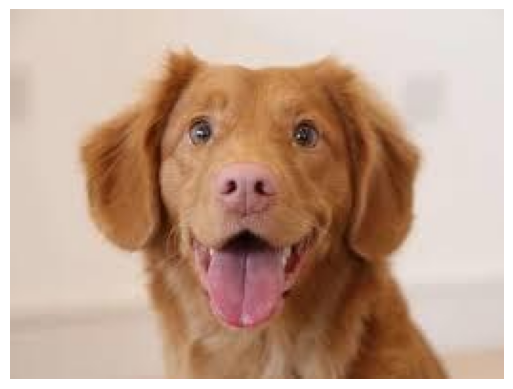

In [40]:
# prompt: open the dogtest image and display it

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = '/content/dogtest.jpg' # Replace with the actual path to your image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

In [35]:
pred("/content/dogtest.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'dog'

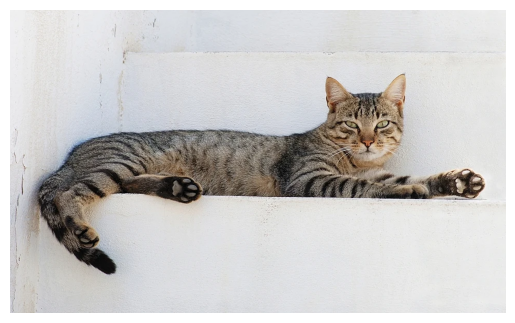

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = '/content/Cat_August_2010-4.jpg.webp' # Replace with the actual path to your image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

In [36]:
pred('/content/Cat_August_2010-4.jpg.webp')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


'cat'

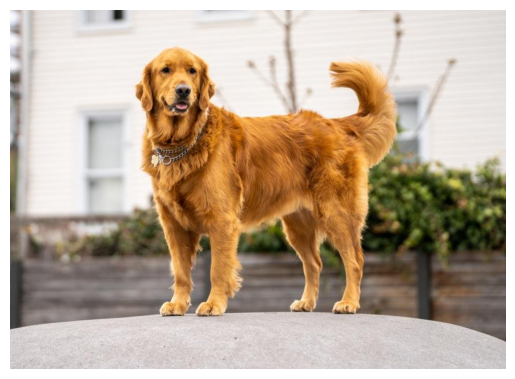

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = '/content/Golden+Retrievers+dans+pet+care.jpg' # Replace with the actual path to your image
img = mpimg.imread(img_path)
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

In [43]:
pred('/content/Golden+Retrievers+dans+pet+care.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


'dog'